<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests
!pip install openpyxl
from openpyxl import Workbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 18.7 MB/s eta 0:00:00


Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
rows = table.find_all('tr')
language_name = []
annual_average_salary = []
for row in rows:
    cols = row.find_all('td')
    language = cols[1].getText()
    salary = cols[3].getText()
    language_name.append(language)
    annual_average_salary.append(salary)


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
wb = Workbook()
pop_lang = wb.active
pop_lang.title = "Salaries"
for lang, sal in zip(language_name, annual_average_salary):
    print([lang, sal])
    pop_lang.append([lang, sal])
wb.save("popular_languages.xlsx")

['Language', 'Average Annual Salary']
['Python', '$114,383']
['Java', '$101,013']
['R', '$92,037']
['Javascript', '$110,981']
['Swift', '$130,801']
['C++', '$113,865']
['C#', '$88,726']
['PHP', '$84,727']
['SQL', '$84,793']
['Go', '$94,082']


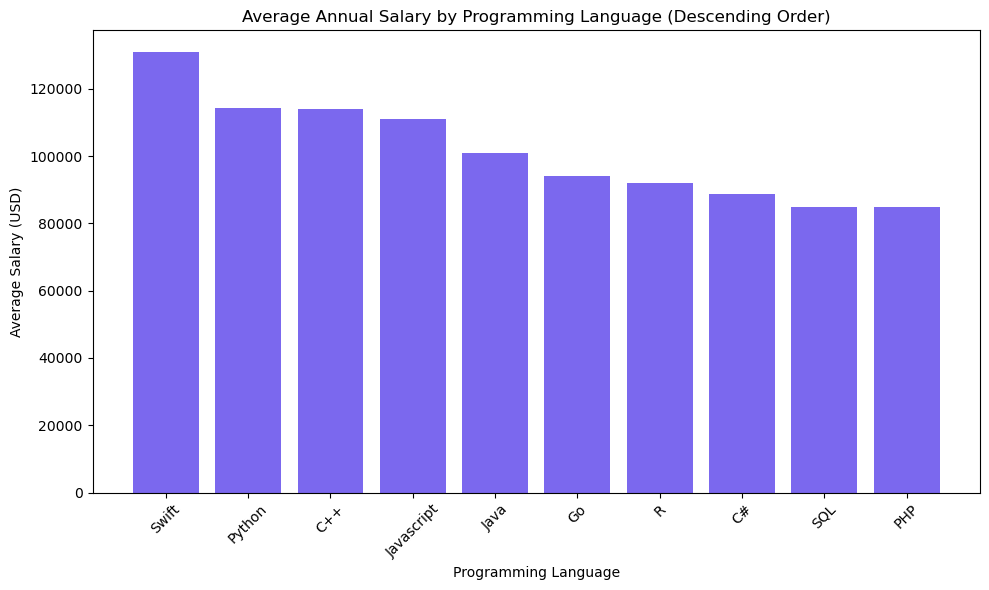

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'popular_languages.xlsx'
df = pd.read_excel(file_path)

# Clean column names (optional but helpful)
df.columns = df.columns.str.strip()

# Remove $ and commas from salary and convert to numeric
df['Average Annual Salary'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)

# Sort by salary in descending order
df_sorted = df.sort_values(by='Average Annual Salary', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='mediumslateblue')
plt.title('Average Annual Salary by Programming Language (Descending Order)')
plt.xlabel('Programming Language')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
